# Zadanie 4.1: Warstwa gęsta (Dense) – Klasyfikacja IRIS z aktywacją tanh
### Należy zbudować sieć w pełni połączoną (MLP) do klasyfikacji danych IRIS, ale zamiast domyślnej funkcji aktywacji relu, użyć funkcji tanh

c:\Users\Maciek\Desktop\NaukaODanychII\.venv\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Trening modelu Dense (IRIS z tanh)

Dokładność na zbiorze testowym: 0.87


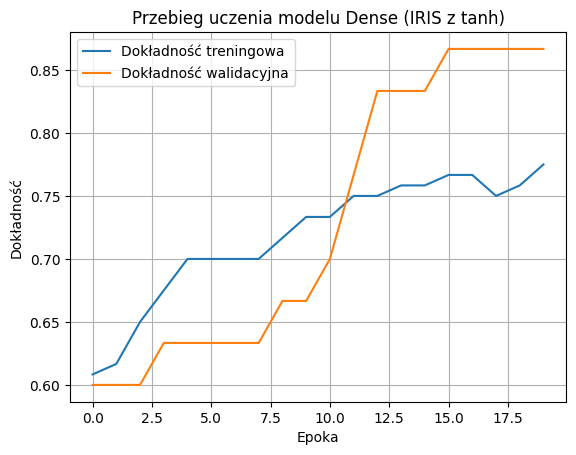

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# 1. Dane IRIS
iris = load_iris()
X, y = iris.data, iris.target

# Skalowanie cech 
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# 2. Model z aktywacją tanh
model_dense = tf.keras.Sequential([
    # Zmiana aktywacji na tanh w warstwie ukrytej
    tf.keras.layers.Dense(10, activation='tanh', input_shape=(4,)),
    # Warstwa wyjściowa ma 3 neurony (dla 3 klas) i aktywację softmax
    tf.keras.layers.Dense(3, activation='softmax')
])

# 3. Kompilacja i trening modelu
model_dense.compile(optimizer='adam',
                    loss='sparse_categorical_crossentropy',
                    metrics=['accuracy'])

print("Trening modelu Dense (IRIS z tanh)")
history_dense = model_dense.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test), verbose=0)

# 4. Ewaluacja i wizualizacja
loss, acc = model_dense.evaluate(X_test, y_test, verbose=0)
print(f"\nDokładność na zbiorze testowym: {acc:.2f}")

# Wykresy uczenia
plt.plot(history_dense.history['accuracy'], label='Dokładność treningowa')
plt.plot(history_dense.history['val_accuracy'], label='Dokładność walidacyjna')
plt.title('Przebieg uczenia modelu Dense (IRIS z tanh)')
plt.xlabel('Epoka')
plt.ylabel('Dokładność')
plt.legend()
plt.grid(True)
plt.show()

# Zadanie 4.2: Warstwa konwolucyjna (Conv2D) – MNIST z dodatkowym Dropoutem
### Należy zbudować sieć konwolucyjną (CNN) do rozpoznawania cyfr MNIST, dodając warstwę `Dropout(0.25)` po każdej warstwie `MaxPooling2D` w celu regularyzacji.

c:\Users\Maciek\Desktop\NaukaODanychII\.venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Trening modelu CNN (MNIST z Dropout)

Dokładność na zbiorze testowym: 0.99


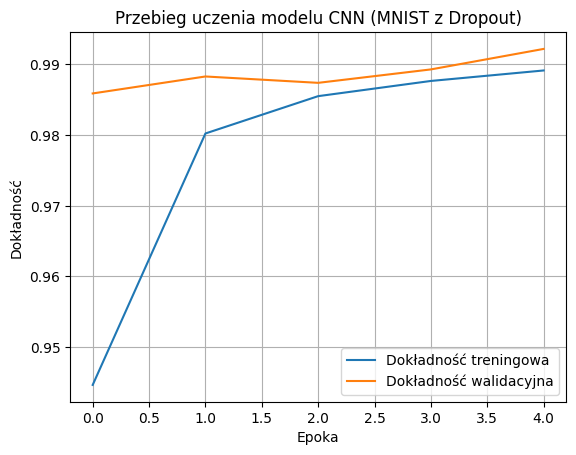

In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt

# 1. Dane MNIST
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Dodanie wymiaru kanału i normalizacja pikseli
x_train = x_train[..., tf.newaxis] / 255.0
x_test = x_test[..., tf.newaxis] / 255.0

# 2. Budowa sieci konwolucyjnej z Dropoutem
model_cnn = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    # dodanie warstwy Dropout po pierwszym MaxPooling2D
    tf.keras.layers.Dropout(0.25),
    
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    # dodanie warstwy Dropout po drugim MaxPooling2D
    tf.keras.layers.Dropout(0.25),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

# 3. Kompilacja i trening modelu
model_cnn.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

print("\nTrening modelu CNN (MNIST z Dropout)")
history_cnn = model_cnn.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test), verbose=0)

# 4. Ewaluacja i wizualizacja
loss, acc = model_cnn.evaluate(x_test, y_test, verbose=0)
print(f"\nDokładność na zbiorze testowym: {acc:.2f}")

# Wykresy uczenia
plt.plot(history_cnn.history['accuracy'], label='Dokładność treningowa')
plt.plot(history_cnn.history['val_accuracy'], label='Dokładność walidacyjna')
plt.title('Przebieg uczenia modelu CNN (MNIST z Dropout)')
plt.xlabel('Epoka')
plt.ylabel('Dokładność')
plt.legend()
plt.grid(True)
plt.show()

# Zadanie 4.3: Warstwa rekurencyjna (LSTM) – IMDB ze zwiększoną liczbą neuronów
### Należy zbudować sieć rekurencyjną do analizy recenzji filmowych z bazy IMDB, używając warstwy LSTM ze zwiększoną liczbą jednostek `neuronów` do 128.

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step

Trening modelu LSTM (IMDB z 128 jednostkami)

Dokładność na zbiorze testowym: 0.86


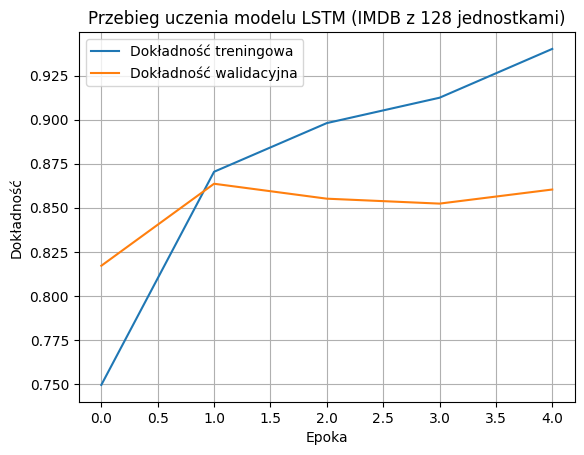

In [3]:
import tensorflow as tf
import matplotlib.pyplot as plt

# 1. Dane IMDB
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.imdb.load_data(num_words=10000)

# Ujednolicenie długości sekwencji (padding)
x_train = tf.keras.preprocessing.sequence.pad_sequences(x_train, maxlen=500)
x_test = tf.keras.preprocessing.sequence.pad_sequences(x_test, maxlen=500)

# 2. Budowa modelu rekurencyjnego z LSTM(128)
model_lstm = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=10000, output_dim=32),
    # zwiększenie liczby jednostek LSTM do 128
    tf.keras.layers.LSTM(128),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# 3. Kompilacja i trening
model_lstm.compile(optimizer='adam',
                   loss='binary_crossentropy',
                   metrics=['accuracy'])

print("\nTrening modelu LSTM (IMDB z 128 jednostkami)")
history_lstm = model_lstm.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test), verbose=0)

# 4. Ewaluacja i wizualizacja
loss, acc = model_lstm.evaluate(x_test, y_test, verbose=0)
print(f"\nDokładność na zbiorze testowym: {acc:.2f}")

# Wykresy uczenia
plt.plot(history_lstm.history['accuracy'], label='Dokładność treningowa')
plt.plot(history_lstm.history['val_accuracy'], label='Dokładność walidacyjna')
plt.title('Przebieg uczenia modelu LSTM (IMDB z 128 jednostkami)')
plt.xlabel('Epoka')
plt.ylabel('Dokładność')
plt.legend()
plt.grid(True)
plt.show()

# Zadanie 4.4: Warstwa Transformer – Eksperyment z aktywacją GELU
### Należy zbudować prosty model oparty na mechanizmie atencji (Transformer) i przetestować w nim funkcję aktywacji GELU w warstwie Feed-Forward.


Trening modelu Transformer (sztuczne dane z GELU)

Błąd średniokwadratowy na danych testowych: 0.3738


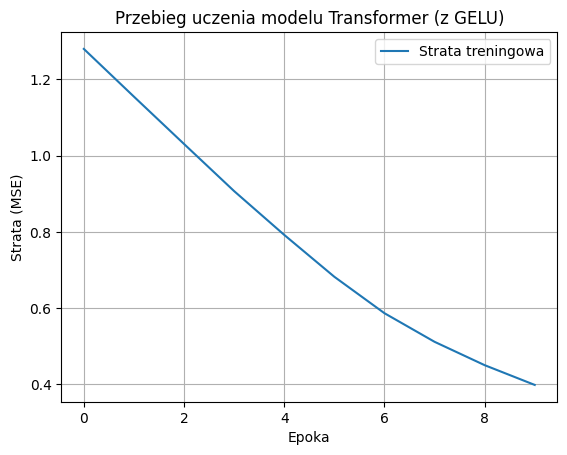

In [4]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

# 1. Sztuczne dane sekwencyjne
X = np.random.rand(1000, 10, 512)
Y = np.random.rand(1000, 10, 512) # Docelowe dane pasujące do wyjścia

# 2. Budowa modelu Transformer z aktywacją GELU
input_layer = tf.keras.layers.Input(shape=(10, 512))
attention_output = tf.keras.layers.MultiHeadAttention(num_heads=4, key_dim=64)(input_layer, input_layer)
# Pierwsze połączenie rezydualne i normalizacja
add_norm_1 = tf.keras.layers.LayerNormalization()(input_layer + attention_output)

# Warstwa Feed-Forward z aktywacją GELU
ff_output = tf.keras.layers.Dense(512, activation='gelu')(add_norm_1) 
# Drugie połączenie rezydualne i normalizacja
output = tf.keras.layers.LayerNormalization()(add_norm_1 + ff_output)

model_transformer = tf.keras.Model(inputs=input_layer, outputs=output)

# 3. Kompilacja i trening
model_transformer.compile(optimizer='adam', loss='mse')

print("\nTrening modelu Transformer (sztuczne dane z GELU)")
history_transformer = model_transformer.fit(X, Y, epochs=10, batch_size=32, verbose=0)

# 4. Ewaluacja i wizualizacja
loss = model_transformer.evaluate(X, Y, verbose=0)
print(f"\nBłąd średniokwadratowy na danych testowych: {loss:.4f}")

# Wykres straty
plt.plot(history_transformer.history['loss'], label='Strata treningowa')
plt.title('Przebieg uczenia modelu Transformer (z GELU)')
plt.xlabel('Epoka')
plt.ylabel('Strata (MSE)')
plt.legend()
plt.grid(True)
plt.show()